<a href="https://colab.research.google.com/github/stalin99835/DUDL/blob/main/DUDL_ANN_XclassifyQwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [ ]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

(2, 100)


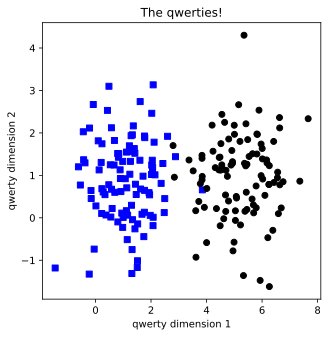

In [ ]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

print(np.shape(a))

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()
#labels = torch.squeeze(labels)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

print(type(labels))
print(np.shape(labels))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])
<class 'torch.Tensor'>
torch.Size([200, 1])


In [ ]:
# build the model
#ANNclassify = nn.Sequential(
#    nn.Linear(2,1),   # input layer
#    nn.ReLU(),        # activation unit
#    nn.Linear(1,1),   # output unit
#    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
#      )

#ANNclassify
class ANNclassifyClass(nn.Module):
  def __init__(self):
    super().__init__()

    ## input layer
    self.input = nn.Linear(2,1)

    ##output layer
    self.output = nn.Linear(1,1)

  def printer(self):
    print('my printer')

  ## forward pass
  def forward(self, x):
    x = self.input(x)

    ##apply Relu
    x = F.relu(x)

    ##output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return(x)

In [ ]:
# other model features
ANNclassify = ANNclassifyClass()
ANNclassify.printer()

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)




my printer


In [ ]:
# train the model
numepochs = 10000
epoch=0
losses = torch.zeros(numepochs)
acc=0.1

for epochi in range(numepochs):
  # forward pass
  yHat = ANNclassify.forward(data)
  preds = yHat > 0.5
  correct = np.where(preds == labels)[0]
  #print(labels)

  # compute loss
  loss = lossfun(yHat,labels)
  #print(loss)
  #print(loss)
  #losses[epochi] = loss
  losses[epochi] = loss
  # find errors


  #print(len(yHat))
  #print(len(labels))
  #print(len(wrong))

  #acc = len(correct)/(2*nPerClust)
  #if acc > 0.9:
  #  print(acc)
  if (len(correct)/(2*nPerClust)) > acc:
    acc = len(correct)/(2*nPerClust)
    #print(acc)

  # total accuracy
  #totalacc = 100-100*len(misclassified)/(2*nPerClust)
  #print(acc)
  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #epoch = epoch+1
print('final acc')
print(acc)

final acc
0.985


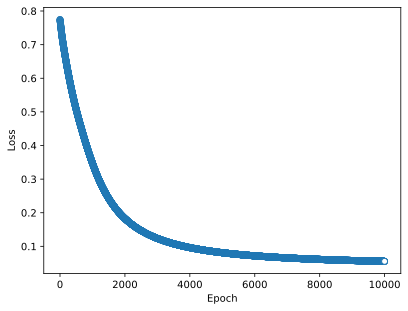

In [ ]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5
#print(predictions)
print('pred labels')
print(predlabels.shape)
print('predictions')
print(predictions.shape)

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)
print('data')
print(data.shape)
print('data np')
print(data_np.shape)
#print(labels)
#print(np.shaeb)

pred labels
torch.Size([200, 1])
predictions
torch.Size([200, 1])
Final accuracy: 98.5%
data
torch.Size([200, 2])
data np
(200, 2)


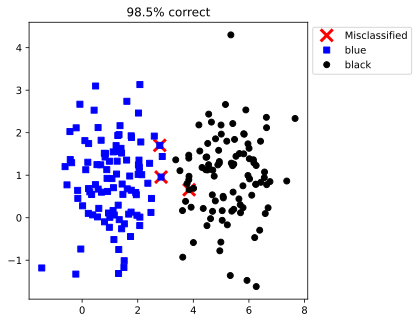

In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
#plt.plot(data[misclassified] ,data[misclassified],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()
#print(predlabels)
#print(data[misclassified,0])
#print(data[misclassified,1])
#print(misclassified)
#print(data[np.where(predlabels)[0],0])
#print(data[np.where(predlabels)[0],1])
#print(predlabels)

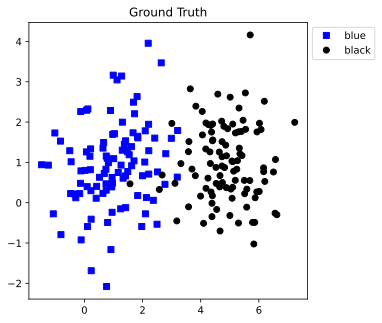

In [ ]:
# plot the labeled data
#print(labels)
fig = plt.figure(figsize=(5,5))
#plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
#plt.plot(data[misclassified] ,data[misclassified],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0] ,data[np.where(labels==1)[0],1] ,'ko')

plt.legend(['blue','black'],bbox_to_anchor=(1,1))
plt.title('Ground Truth')
plt.show()

# Additional explorations

In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
#
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the
#    qwerty-generating code to get the model to have 100% classification accuracy.
#